In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')

In [3]:
train_df.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8155,Jet Airways,27/06/2019,Delhi,Cochin,DEL → IDR → BOM → COK,05:30,19:00,13h 30m,2 stops,In-flight meal not included,11507
5427,Jet Airways,24/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,04:40 25 May,12h 10m,1 stop,In-flight meal not included,10844
5148,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,9929
10492,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,12:35,7h 40m,1 stop,No info,10678
1569,Air Asia,18/05/2019,Delhi,Cochin,DEL → BLR → COK,07:55,22:25,14h 30m,1 stop,No info,7452
3142,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,19:50,11h 25m,1 stop,In-flight meal not included,8586
8139,Air Asia,9/05/2019,Delhi,Cochin,DEL → BLR → COK,16:45,22:25,5h 40m,1 stop,No info,6752
5459,Air India,6/05/2019,Banglore,Delhi,BLR → DEL,13:20,16:10,2h 50m,non-stop,No info,5228
6923,Vistara,6/05/2019,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668
10481,SpiceJet,27/03/2019,Delhi,Cochin,DEL → MAA → COK,06:10,11:20,5h 10m,1 stop,No info,5351


In [4]:
train_df.shape

(10683, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_df.dropna(inplace=True)

In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [10]:
train_df['journey_day']=pd.to_datetime(train_df['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [11]:
train_df['journey_month']=pd.to_datetime(train_df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [12]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_df.drop('Date_of_Journey', inplace=True, axis=1)

In [14]:
train_df['departure_hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['departure_min']=pd.to_datetime(train_df['Dep_Time']).dt.minute

In [15]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,departure_hour,departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
train_df.drop('Dep_Time',axis=1, inplace=True)

In [17]:
train_df['arrival_hour']=pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['arrival_minute']=pd.to_datetime(train_df['Arrival_Time']).dt.minute

In [18]:
train_df.drop('Arrival_Time',axis=1, inplace=True)

In [19]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,departure_hour,departure_min,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
"5h 25m".split()

['5h', '25m']

In [21]:
len("5h 25m".split())

2

In [22]:
duration = list(train_df['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
duration_hours = []
duration_minutes = []  
 
for i in range(len(duration)) :
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_minutes.append(int(duration[i].split()[1][:-1]))

In [23]:
train_df['duration_hrs']=duration_hours
train_df['duration_mins']=duration_minutes

In [24]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,departure_hour,departure_min,arrival_hour,arrival_minute,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
train_df.drop('Duration', axis=1, inplace=True)

In [26]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

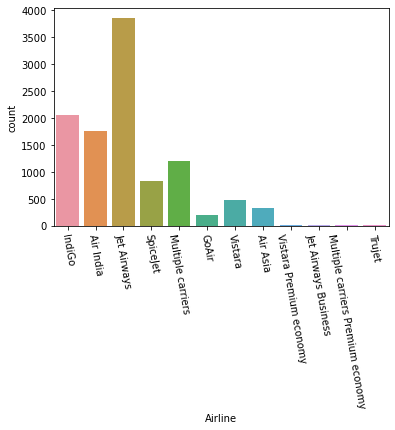

In [27]:
sns.countplot(x='Airline', data=train_df)
plt.xticks(rotation=-80)

In [28]:
airline=train_df['Airline']
airline=pd.get_dummies(airline, drop_first=True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
Source=train_df['Source']

In [30]:
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
Destination=train_df['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → NDC → HYD                   1
BOM → BLR → CCU → BBI → HYD       1
BLR → HBX → BOM → NAG → DEL       1
BOM → JAI → DEL → HYD             1
BOM → GOI → HYD                   1
Name: Route, Length: 128, dtype: int64

In [33]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
train_df.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [35]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,departure_hour,departure_min,arrival_hour,arrival_minute,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [36]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
train_df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [38]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,departure_hour,departure_min,arrival_hour,arrival_minute,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [39]:
train=pd.concat([train_df, airline, Source, Destination],axis=1)

In [40]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,departure_hour,departure_min,arrival_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [41]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'departure_hour', 'departure_min',
       'arrival_hour', 'arrival_minute', 'duration_hrs', 'duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [42]:
train.drop(['Airline','Source', 'Destination'],axis=1, inplace=True)

In [43]:
train.head()

,Total_Stops,Price,journey_day,journey_month,departure_hour,departure_min,arrival_hour,arrival_minute,duration_hrs,duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [44]:
train.shape

(10682, 30)

In [45]:
test_df=pd.read_excel('Test_set.xlsx')

In [46]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
test_df.dropna(inplace=True)
test_df['journey_day']=pd.to_datetime(test_df['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_df['journey_month']=pd.to_datetime(test_df['Date_of_Journey'], format='%d/%m/%Y').dt.month
test_df['departure_hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['departure_min']=pd.to_datetime(test_df['Dep_Time']).dt.minute


In [48]:
test_df.drop('Dep_Time',axis=1, inplace=True)
test_df['arrival_hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['arrival_minute']=pd.to_datetime(test_df['Arrival_Time']).dt.minute
test_df.drop('Arrival_Time',axis=1, inplace=True)


In [49]:
duration = list(test_df['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
duration_hours = []
duration_minutes = []  
 
for i in range(len(duration)) :
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_minutes.append(int(duration[i].split()[1][:-1]))

In [50]:
test_df['duration_hrs']=duration_hours
test_df['duration_mins']=duration_minutes

In [51]:
test_df.drop('Duration', axis=1, inplace=True)
airline=test_df['Airline']
airline=pd.get_dummies(airline, drop_first=True)

In [52]:
Source=test_df['Source']
Source=pd.get_dummies(Source, drop_first=True)
Destination=test_df['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)

In [53]:
test_df.drop(['Route','Additional_Info'],axis=1, inplace=True)
test_df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)
test_data=pd.concat([train_df, airline, Source, Destination],axis=1)

In [54]:
test_data.drop(['Airline','Source', 'Destination'],axis=1, inplace=True)

In [55]:
test_data.head()

,Total_Stops,Price,journey_day,journey_month,departure_hour,departure_min,arrival_hour,arrival_minute,duration_hrs,duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,7662,1,5,5,50,13,15,7,25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,13882,9,6,9,25,4,25,19,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6218,12,5,18,5,23,30,5,25,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,13302,1,3,16,50,21,35,4,45,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
test_data.shape

(10682, 29)

In [57]:
X=train.drop('Price', axis=1)

In [58]:
y=train.pop('Price')

In [59]:
print(X.shape)
print(y.shape)

(10682, 29)
(10682,)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.30, random_state=1)

In [61]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [62]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
model.score(X_train,y_train)

0.9567379896225722

In [64]:
predict=model.predict(X_test)

In [65]:
model.score(X_test, y_test)

0.8080117883360769

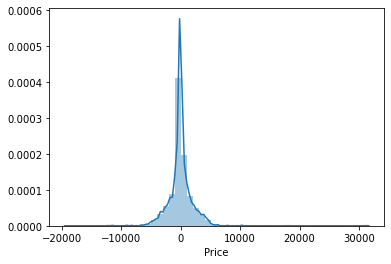

In [66]:
sns.distplot(y_test-predict)

Text(0, 0.5, 'predict')

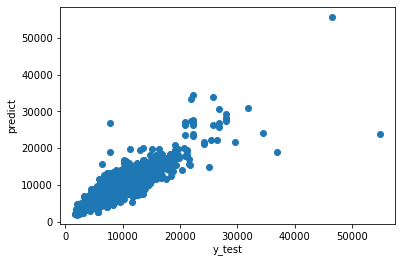

In [67]:
plt.scatter(y_test,predict)
plt.xlabel('y_test')
plt.ylabel('predict')

In [68]:
import pickle

In [69]:
pickle.dump(model,open('flight_fare.pkl','wb'))

In [70]:
model_r=pickle.load(open('flight_fare.pkl','rb'))

In [71]:
result=model_r.predict(X_test)

In [72]:
result

array([ 5181.49      , 11757.5095    , 12207.57933333, ...,
        3857.11      , 11945.94916667, 10818.96      ])

In [73]:
from sklearn import metrics

In [74]:
metrics.r2_score(y_test,result)

0.8080117883360769